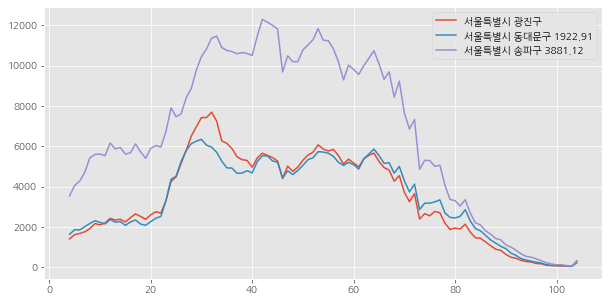

In [22]:
# 실습: 인구 구조
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

f = open('people.csv', 'r', encoding='UTF8')
data = csv.reader(f)
next(data)
# 행정기관코드 행정기관 총 인구수 연령구간인구수
#      0          1        2            3
# [4]~[104] = 0세~100세 이상 

df = pd.DataFrame(data)

for i in df.columns:
    if(i==0 or i==1):
        continue
    else:
        for j in df.index:
            num = df[i][j].replace(",","")
            df[i][j] = int(num)

for i in df.index:
    temp = df[1][i]
    if('광진구' in temp):
        gjg = df.loc[i]
        gjg_n = temp
        
for i in range(4): # 광진구 나이별 인원만 남기기
    gjg = gjg.drop(i)

    
high = 0
high_n = ''
low = 99999999999999
low_n = ''

for i in df.index:
    temp = df[1][i]
    
    if(('광진구' in temp) or(temp == '서울특별시  ') ):
        continue
    else:
        vs = df.loc[i]
        
    for j in range(4): # 비교 지역 나이별 인원만 남기기
        vs = vs.drop(j)
    
    a = np.array(gjg)
    b = np.array(vs)

    result = np.square(b-a).sum()
    #print(result)
    if (result > high): # 가장 크면 가장 다른 지역
        high = result
        high_n = temp
        high_p = vs
    if (result < low): # 가장 작으면 가장 비슷한 지역
        low = result
        low_n = temp
        low_p = vs

#print(high, high_n, high_p)
#print(low, low_n, low_p)

plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(gjg, label='{}'.format(gjg_n))
plt.plot(low_p, label='{}{:.2f}'.format(low_n, np.std(low_p)))
plt.plot(high_p, label='{}{:.2f}'.format(high_n, np.std(high_p)))
plt.legend()
plt.show()